In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
from google.colab import files
uploaded = files.upload()

file_name = next(iter(uploaded))
path = io.BytesIO(uploaded[file_name])

df = pd.read_csv(path, sep='\t', names=column_names)

df.head()

Saving file (4).tsv to file (4) (2).tsv


,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
from google.colab import files
uploaded = files.upload()
movie_titles = pd.read_csv('Movie_Id_Titles.csv')
movie_titles.head()

Saving Movie_Id_Titles.csv to Movie_Id_Titles.csv


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [ ]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

,rating
title,
Aiqing wansui (1994),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
Santa with Muscles (1996),5.0
Prefontaine (1997),5.0
They Made Me a Criminal (1939),5.0


In [ ]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Star Wars (1977),584
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485


In [ ]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())

ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [ ]:
sns.set_style('white')
%matplotlib inline


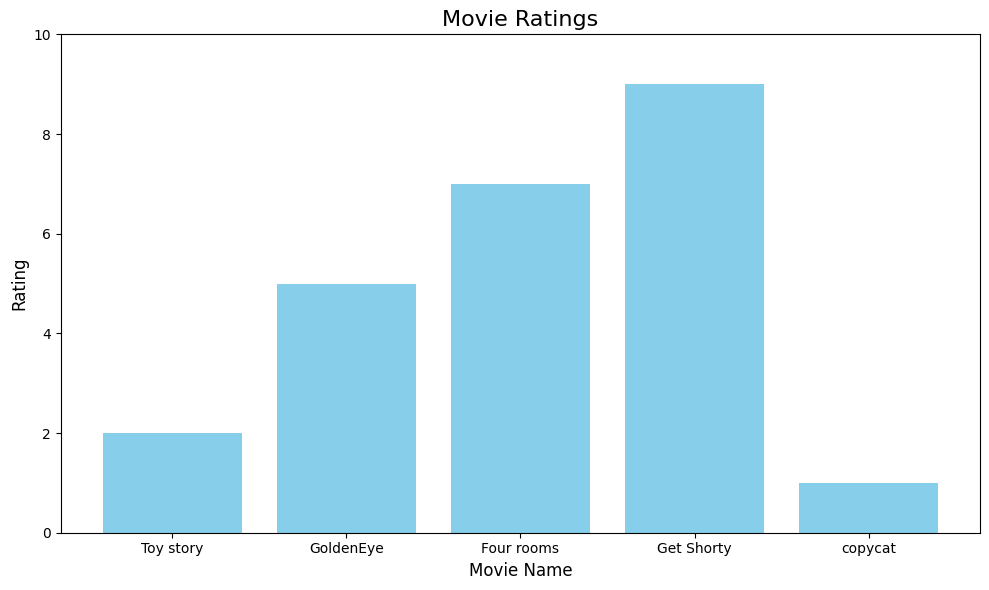

In [ ]:
import matplotlib.pyplot as plt


movie_names = ['Toy story', 'GoldenEye', 'Four rooms', 'Get Shorty', 'copycat']
ratings = [2,5,7,9,1]


plt.figure(figsize=(10, 6))
plt.bar(movie_names, ratings, color='skyblue')

plt.title('Movie Ratings', fontsize=16)
plt.xlabel('Movie Name', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.ylim(0, 10)


plt.tight_layout()
plt.show()


In [ ]:
moviemat = data.pivot_table(index ='user_id',
              columns ='title', values ='rating')

moviemat.head()

ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [ ]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

starwars_user_ratings.head()

,Star Wars (1977)
user_id,
0,5.0
1,5.0
2,5.0
3,NaN
4,5.0


In [ ]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)

corr_starwars.head()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
